Generation 1 maximum fitness is 74
Generation 2 maximum fitness is 74
Generation 3 maximum fitness is 74
Generation 4 maximum fitness is 74
Generation 5 maximum fitness is 74
Generation 6 maximum fitness is 72
Generation 7 maximum fitness is 75
Generation 8 maximum fitness is 75
Generation 9 maximum fitness is 75
Generation 10 maximum fitness is 75
Generation 11 maximum fitness is 75
Generation 12 maximum fitness is 75
Generation 13 maximum fitness is 73
Generation 14 maximum fitness is 73
Generation 15 maximum fitness is 73
Generation 16 maximum fitness is 76
Generation 17 maximum fitness is 76
Generation 18 maximum fitness is 76
Generation 19 maximum fitness is 76
Generation 20 maximum fitness is 74
Generation 21 maximum fitness is 74
Generation 22 maximum fitness is 74
Generation 23 maximum fitness is 74
Generation 24 maximum fitness is 74
Generation 25 maximum fitness is 74
Generation 26 maximum fitness is 74
Generation 27 maximum fitness is 72
Generation 28 maximum fitness is 72
G

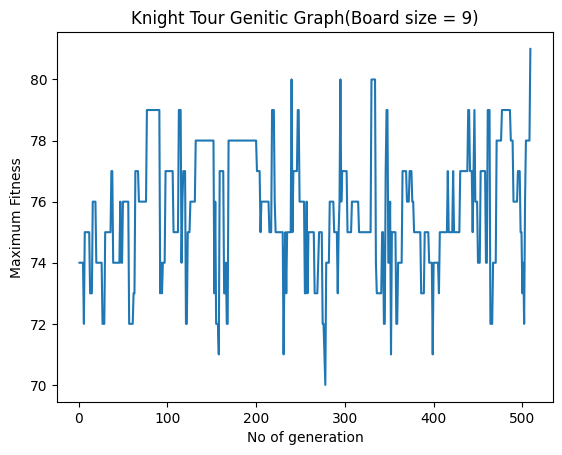

In [2]:
import random
import matplotlib.pyplot as plt
dx = [2, 1, -1, -2, -2, -1, 1, 2]
dy = [1, 2, 2, 1, -1, -2, -2, -1]
initX, initY = 0, 0
boardSize = 9 #5->9
populationSize = 50
generations = 1000
NoOfgenerations = 0
maxFitness = []
class Chromosome:
    def __init__(self, genes=None):
        self.genes = genes if genes is not None else [random.randint(1, 8) for _ in range(boardSize*boardSize-1)]

class Knight:
    def __init__(self, chromosome=None):
        self.x, self.y, self.steps, self.fitness = 0, 0, 0, 0
        self.path = [(self.x, self.y)]
        self.checkForward = random.randint(0,1) 
        self.chromosome = chromosome if chromosome is not None else Chromosome()

if __name__ == "__main__":  
    population = [Knight() for _ in range(populationSize)]   
    for generation in range(generations):
        #generate population
        for i in range(boardSize*boardSize - 1):
            for knight in population:
                legal = False
                limit = 0
                while not legal and limit < 8:
                    direction = knight.chromosome.genes[knight.steps]
                    knight.x += dx[direction-1]
                    knight.y += dy[direction-1]
                    if 0 <= knight.x < boardSize and 0 <= knight.y < boardSize:
                        legal = True
                        for i in range(len(knight.path)):
                            if knight.path[i] == (knight.x, knight.y):
                                legal = False
                    if not legal:
                        knight.x -= dx[direction-1]
                        knight.y -= dy[direction-1]
                        if knight.checkForward == 1:
                            knight.chromosome.genes[knight.steps] = (knight.chromosome.genes[knight.steps] % 8) + 1
                        else:
                            knight.chromosome.genes[knight.steps] = ((knight.chromosome.genes[knight.steps] + 6) % 8) + 1
                    limit += 1
                knight.path.append((knight.x, knight.y))
                knight.steps += 1
        #generate fitness for each individual
        knightsWithFitness = []
        for knight in population:
            legal = True
            knight.fitness = 0
            for i in range(len(knight.path)):
                if not (0 <= knight.path[i][0] < boardSize and 0 <= knight.path[i][1] < boardSize):
                    legal = False
                for j in range(i):
                    if knight.path[i] == knight.path[j]:
                        legal = False
                if not legal:
                    break
                knight.fitness += 1
            knightsWithFitness.append( (knight.fitness , knight) )

        knightsWithFitness = sorted(knightsWithFitness , key= lambda x: x[0] , reverse= True)
        best_knight = knightsWithFitness[0][1]
        max_fit = knightsWithFitness[0][0]
        print(f"Generation {generation + 1} maximum fitness is {max_fit}")
        NoOfgenerations = generation+1
        maxFitness.append(max_fit)
        if max_fit == boardSize * boardSize:
            print(f"Done with {generation + 1} generations")
            break
        #generate parents    
        parents = [] #knight
        count = 0
        for sol in knightsWithFitness:
            count+=1
            parents.append(sol[1])
            if count == 20:
                break
        #generate children
        children = []
        desiredLengthForChildren = populationSize - len(parents)
        while len(children) < desiredLengthForChildren:
            parent1 = random.choice(parents).chromosome #genes
            parent2 = random.choice(parents).chromosome
            #crossover
            mid = random.randint(0, boardSize*boardSize-1)
            childChromosome = Chromosome(parent1.genes[mid:] + parent2.genes[:mid])
            children.append(Knight(childChromosome))
        parents.extend(children)
        #new population
        population = parents    
        for knight in population:
            knight.x , knight.y , knight.steps , knight.fitness = initX , initY , 0, 0
            knight.path = [ (initX,initY) ]
            #mutation
            for i in range(len(knight.chromosome.genes)):
                if random.random() < 0.01:
                    knight.chromosome.genes[i] = random.randint(1, 8)
#Visualize plot
plt.plot(range(1,NoOfgenerations+1), maxFitness)
plt.title('Knight Tour Genitic Graph(Board size = {})'.format(boardSize))
plt.xlabel('No of generation')
plt.ylabel('Maximum Fitness')
plt.show()    